# Antes de empezar:
- Lee el archivo README.md
- Comenta tanto como puedas y utiliza los recursos (archivo README.md)
- ¡Feliz aprendizaje!

In [1]:
# import numpy and pandas
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, beta
from statsmodels.stats.weightstats import ztest as ztest

from scipy.stats import ttest_ind, norm, t
from scipy.stats import f_oneway
from scipy.stats import sem

# Reto 1 - Explorando los Datos

En este reto, examinaremos todos los salarios de los empleados de la Ciudad de Chicago. Comenzaremos cargando el conjunto de datos y examinando su contenido.

In [2]:
# Run this code:
salaries = pd.read_csv('C:\\Users\\Ale\\Documents\\IronHack\\Git\\salidas\\Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examina el conjunto de datos `salaries` utilizando la función `head` que se muestra a continuación.

In [21]:
# Your code here

salaries.describe()
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


# Reto 2 - Pruebas de Hipótesis

En esta sección del laboratorio, vamos a probar si el salario por hora de todos los trabajadores por hora es significativamente diferente de $30/hora. Importa la función correcta para la prueba de una muestra desde scipy y realiza la prueba de hipótesis para un intervalo de confianza de dos lados del 95%.

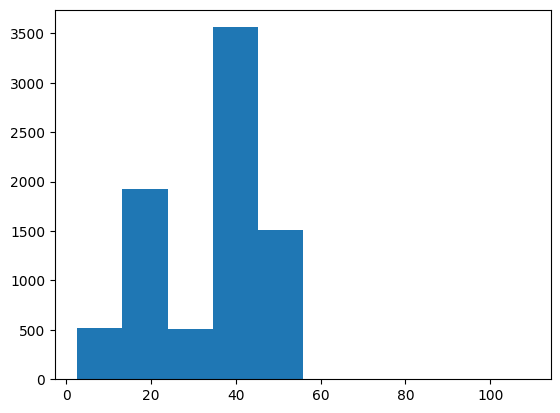

In [11]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np

plt.hist(salaries['Hourly Rate'])
plt.show() 


In [16]:
salaries['Hourly Rate'].isna().sum()
hourly_rates = salaries['Hourly Rate'].dropna()

# Eliminamos outliers
Q1 = hourly_rates.quantile(0.25)
Q3 = hourly_rates.quantile(0.75)
IQR = Q3-Q1

li = Q1-1.5*IQR
ls = Q3+1.5*IQR

hourly_rates_filtrado = hourly_rates[(hourly_rates >= li) & (hourly_rates <= ls)]
hourly_rates_filtrado


4        19.86
6        46.10
7        35.60
10        2.65
18       17.68
         ...  
33164    46.10
33168    17.68
33169    35.60
33174    46.35
33175    48.85
Name: Hourly Rate, Length: 8020, dtype: float64

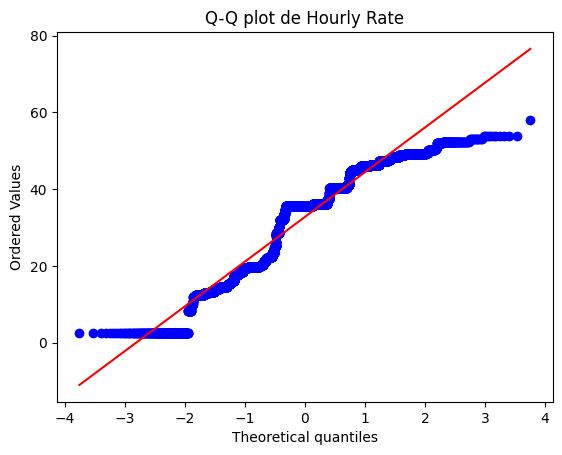

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Gráfico Q-Q plot
stats.probplot(hourly_rates_filtrado, dist="norm", plot=plt)
plt.title('Q-Q plot de Hourly Rate')
plt.show()

In [15]:
stats.ttest_1samp(hourly_rates_filtrado, 30) 

TtestResult(statistic=20.5713941289435, pvalue=1.1183837944862145e-91, df=8019)

# Reto 3 - Construyendo Intervalos de Confianza

Aunque probar nuestra hipótesis es una excelente manera de obtener evidencia empírica para aceptar o rechazar la hipótesis, otra forma de recopilar evidencia es creando un intervalo de confianza. Un intervalo de confianza nos brinda información sobre la media verdadera de la población. Por lo tanto, para un intervalo de confianza del 95%, estamos seguros en un 95% de que la media de la población se encuentra dentro del intervalo de confianza.

Para leer más sobre los intervalos de confianza, haz clic [aquí](https://es.wikipedia.org/wiki/Intervalo_de_confianza).

En la celda a continuación, construiremos un intervalo de confianza del 95% para el salario por hora medio de todos los trabajadores por hora.

El intervalo de confianza se calcula en SciPy utilizando la función `t.interval`. Puedes leer más sobre esta función [aquí](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

Para calcular el intervalo de confianza del salario por hora, usa 0.95 para el nivel de confianza, el número de filas - 1 para los grados de libertad, la media de la muestra para el parámetro de ubicación y el error estándar para la escala. El error estándar se puede calcular utilizando [esta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) función en SciPy.

In [20]:
# Your code here
import numpy as np
from scipy.stats import t, sem
# Media y error
media_salarios_hora = np.mean(hourly_rates_filtrado)
std_error = sem(hourly_rates_filtrado)
grados_libertad = len(hourly_rates_filtrado)-1

# Intervalor de confianza
ci = t.interval(0.95, grados_libertad, loc=media_salarios_hora, scale=std_error)
ci


(32.5090344993306, 33.03757397947239)

# Reto 4 - Pruebas de Hipótesis de Proporciones

<!-- Otro tipo de prueba de una muestra es una prueba de hipótesis de proporciones. En esta prueba, examinamos si la proporción de un grupo en nuestra muestra es significativamente diferente de una fracción. -->

Puedes leer más sobre las pruebas de proporción de una muestra [aquí](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

En la celda a continuación, utiliza la función `proportions_ztest` de `statsmodels` para realizar una prueba de hipótesis que determinará si el número de trabajadores por hora en la Ciudad de Chicago es significativamente diferente del 25% en el nivel de confianza del 95%.

In [22]:
# Your code here

from statsmodels.stats.proportion import proportions_ztest

# Número de éxitos (trabajadores por hora)
count = len(hourly_rates_filtrado)

# Tamaño de la muestra
nobs = len(hourly_rates_filtrado)

# Proporción hipotética bajo prueba (25%)
value = 0.25

# Realizar la prueba de hipótesis z-test para proporciones
statistic, p_value = proportions_ztest(count, nobs, value)

# Imprimir los resultados
print(f'Estadístico de prueba: {statistic}')
print(f'p-value: {p_value}')

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print(f'Con un nivel de significancia de {alpha}, se rechaza la hipótesis nula.')
else:
    print(f'Con un nivel de significancia de {alpha}, no se rechaza la hipótesis nula.')

Estadístico de prueba: inf
p-value: 0.0
Con un nivel de significancia de 0.05, se rechaza la hipótesis nula.


c:\Users\Ale\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std
